In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import sqlite3

In [3]:
df_BarcelonaSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB06Sep24.csv')
df_BarcelonaJune24 =pd.read_csv(r'C:\Users\alber\Downloads\listingsB15June24.csv')
df_BarcelonaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB20March24.csv')
df_BarcelonaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB13Dec23.csv')
df_BarcelonaMarch25 = pd.read_csv(r'C:\Users\alber\Downloads\listingsBarcelonaMarch2025.csv')
df_SevillaJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS30June24.csv')
df_SevillaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS31March24.csv')
df_SevillaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS29Dec23.csv')
df_MadridSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM11Sep24.csv')
df_MadridJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15June24.csv')
df_MadridMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM22March24.csv')
df_MadridDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15Dec23.csv')
df_MadridMarch25 = pd.read_csv(r'C:\Users\alber\Downloads\listingsMadridMarch2025.csv')

In [4]:
df_BSept24_copia = df_BarcelonaSept24.copy()
df_BMarch24_copia = df_BarcelonaMarch24.copy()
df_BJune24_copia = df_BarcelonaJune24.copy()
df_BDec23_copia = df_BarcelonaDec23.copy()
df_BMarch25_copia = df_BarcelonaMarch25.copy()

df_MDec23_copia = df_MadridDec23.copy()
df_MJune24_copia = df_MadridJune24.copy()
df_MSept24_copia = df_MadridSept24.copy()
df_MMarch24_copia = df_MadridMarch24.copy()
df_MMarch25_copia = df_MadridMarch25.copy()

df_SJune24_copia = df_SevillaJune24.copy()
df_SMarch24_copia = df_SevillaMarch24.copy()
df_SDec23_copia = df_BarcelonaDec23.copy()

df_BSept24_copia['month'] = 'September'
df_BMarch24_copia['month'] = 'March'
df_BJune24_copia['month'] = 'June'
df_BDec23_copia['month'] = 'December'  
df_BMarch25_copia['month'] = 'March'


df_MDec23_copia['month'] = 'December'
df_MJune24_copia['month'] = 'June'
df_MSept24_copia['month'] = 'September'
df_MMarch24_copia['month'] = 'March'
df_MMarch25_copia['month'] = 'March'


df_SJune24_copia['month'] = 'June'
df_SMarch24_copia['month'] = 'March'
df_SDec23_copia['month'] = 'December'

df_BSept24_copia['state'] = 'Barcelona'
df_BMarch24_copia['state'] = 'Barcelona'
df_BJune24_copia['state'] = 'Barcelona'
df_BDec23_copia['state'] = 'Barcelona' 
df_MMarch25_copia['state'] = 'Barcelona'
 

df_MDec23_copia['state'] = 'Madrid'
df_MJune24_copia['state'] = 'Madrid'
df_MSept24_copia['state'] = 'Madrid'
df_MMarch24_copia['state'] = 'Madrid'
df_MMarch25_copia['state'] = 'Madrid'


df_SJune24_copia['state'] = 'Sevilla'
df_SMarch24_copia['state'] = 'Sevilla'
df_SDec23_copia['state'] = 'Sevilla'

df_concatenado2_total = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia, df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia, df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia, df_BMarch25_copia, df_MMarch25_copia ], ignore_index=True)

df_concatenado2_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259472 entries, 0 to 259471
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              259472 non-null  object 
 1   name                            253941 non-null  object 
 2   host_id                         253940 non-null  object 
 3   host_name                       253885 non-null  object 
 4   neighbourhood_group             253940 non-null  object 
 5   neighbourhood                   253940 non-null  object 
 6   latitude                        253940 non-null  float64
 7   longitude                       253940 non-null  object 
 8   room_type                       253940 non-null  object 
 9   price                           207603 non-null  float64
 10  minimum_nights                  253940 non-null  float64
 11  number_of_reviews               253940 non-null  object 
 12  last_review     

In [5]:
df_concatenado2_total.to_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetConjunto2.csv', index=False)

In [6]:

# Concatenar los DataFrames
df_concatenado1_Barcelona = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia, df_BarcelonaMarch25], ignore_index=True)


# Concatenar los DataFrames
df_concatenado1_Madrid = pd.concat([df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia, df_MMarch25_copia], ignore_index=True)


# Concatenar los DataFrames
df_concatenado1_Sevilla = pd.concat([df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia], ignore_index=True)




In [7]:
import pandas as pd

# Cargar el dataset
file_path = r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetConjunto2.csv' # Asegúrate de poner la ruta correcta
df = pd.read_csv(file_path, low_memory=False)

# Mostrar primeras filas
print("\n📌 Primeras filas del dataset:")
print(df.head())

# Información general
print("\n📌 Información del dataset:")
print(df.info())

# Revisar valores nulos
print("\n📌 Valores nulos por columna:")
print(df.isnull().sum())

# Identificar valores únicos en algunas columnas clave
columns_to_check = ["neighbourhood_group", "room_type", "state"]
for col in columns_to_check:
    print(f"\n📌 Valores únicos en '{col}':")
    print(df[col].unique())

# Revisar si hay columnas duplicadas
print("\n📌 Nombres de las columnas:")
print(df.columns)




📌 Primeras filas del dataset:
      id                                               name host_id  \
0  18674    Huge flat for 8 people close to Sagrada Familia   71615   
1  23197  Forum CCIB DeLuxe, Spacious, Large Balcony, relax   90417   
2  32711                   Sagrada Familia area - Còrsega 1  135703   
3  34241   Stylish Top Floor Apartment - Ramblas Plaza Real   73163   
4  34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS   73163   

        host_name neighbourhood_group                       neighbourhood  \
0   Mireia  Maria            Eixample                  la Sagrada Família   
1  Etain (Marnie)          Sant Martí               el Besòs i el Maresme   
2            Nick              Gràcia  el Camp d'en Grassot i Gràcia Nova   
3          Andres        Ciutat Vella                      el Barri Gòtic   
4          Andres        Ciutat Vella                      el Barri Gòtic   

    latitude          longitude        room_type  price  ...  \
0  41.405560   

In [8]:
df = pd.read_csv(file_path, low_memory=False)

# Convertir columnas numéricas mal detectadas
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors="coerce")
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors="coerce")

# Eliminar columnas redundantes o irrelevantes
df.drop(columns=["license;", "name", "host_name"], inplace=True)

# Eliminar filas donde 'price' es NaN (ya que es nuestra variable objetivo)
df.dropna(subset=["price"], inplace=True)

df["state"] = df["state"].fillna("Desconocido")
df["neighbourhood_group"] = df["neighbourhood_group"].fillna("Otros")


# Limpiar valores incorrectos en 'room_type'
df = df[df["room_type"].isin(["Entire home/apt", "Private room", "Shared room", "Hotel room"])]

# Verificar nuevamente el estado de los datos
print("\n📌 Información después del preprocesamiento:")
print(df.info())

print("\n📌 Valores nulos restantes:")
print(df.isnull().sum())

# Guardar dataset limpio
df.to_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv', index=False)
print("\n✅ Dataset preprocesado guardado como 'dataset_limpio.csv'")



📌 Información después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
Index: 207602 entries, 0 to 259469
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              207602 non-null  object 
 1   host_id                         207602 non-null  object 
 2   neighbourhood_group             207602 non-null  object 
 3   neighbourhood                   207602 non-null  object 
 4   latitude                        207602 non-null  float64
 5   longitude                       207602 non-null  float64
 6   room_type                       207602 non-null  object 
 7   price                           207602 non-null  float64
 8   minimum_nights                  207602 non-null  float64
 9   number_of_reviews               207602 non-null  float64
 10  last_review                     168190 non-null  object 
 11  reviews_per_month               168190

In [9]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv', low_memory=False)

# 1. Descripción general de las variables numéricas
desc_stats = df[['price', 'minimum_nights', 'number_of_reviews']].describe()
print("Estadísticas descriptivas:\n", desc_stats)

# 2. Identificación de outliers utilizando IQR (Interquartile Range)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_price = identify_outliers(df, 'price')
outliers_min_nights = identify_outliers(df, 'minimum_nights')
outliers_reviews = identify_outliers(df, 'number_of_reviews')

print("\nOutliers en precio:\n", outliers_price)
print("\nOutliers en noches mínimas:\n", outliers_min_nights)
print("\nOutliers en número de reseñas:\n", outliers_reviews)

# 3. Correlación entre variables clave
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].corr()
print("\nMatriz de correlación:\n", correlation_matrix)


Estadísticas descriptivas:
                price  minimum_nights  number_of_reviews
count  207602.000000   207602.000000      207602.000000
mean      147.459813       10.407058          53.260383
std       373.810467       24.757564          97.236882
min         1.000000        1.000000           0.000000
25%        61.000000        1.000000           1.000000
50%       100.000000        2.000000          13.000000
75%       162.000000        7.000000          61.000000
max     56815.000000     1125.000000        3091.000000

Outliers en precio:
                          id      host_id neighbourhood_group  \
4                     34981      73163.0        Ciutat Vella   
16                    73683     135703.0              Gràcia   
20                    89756     488117.0        Ciutat Vella   
27                   118228     567180.0            Eixample   
38                   174382     567180.0            Eixample   
...                     ...          ...                 ...  

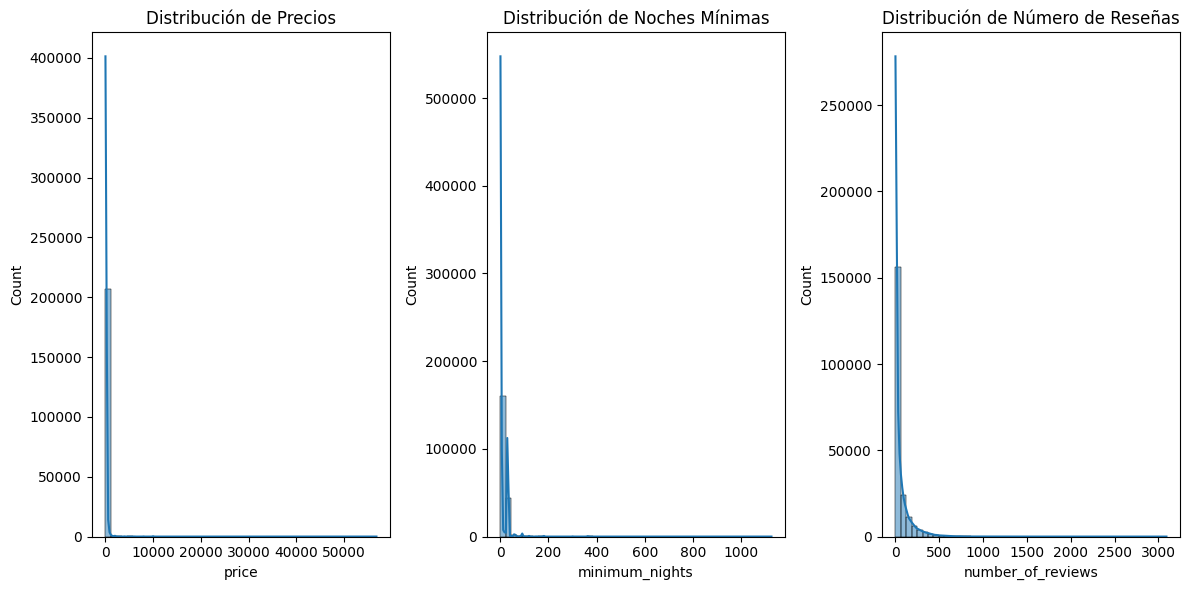

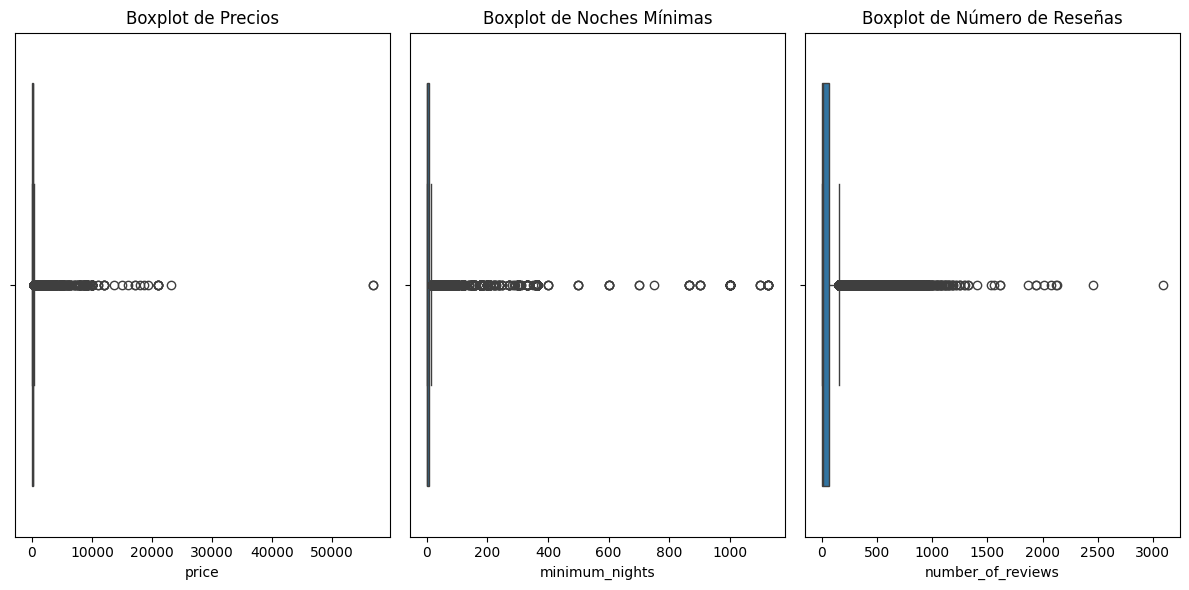

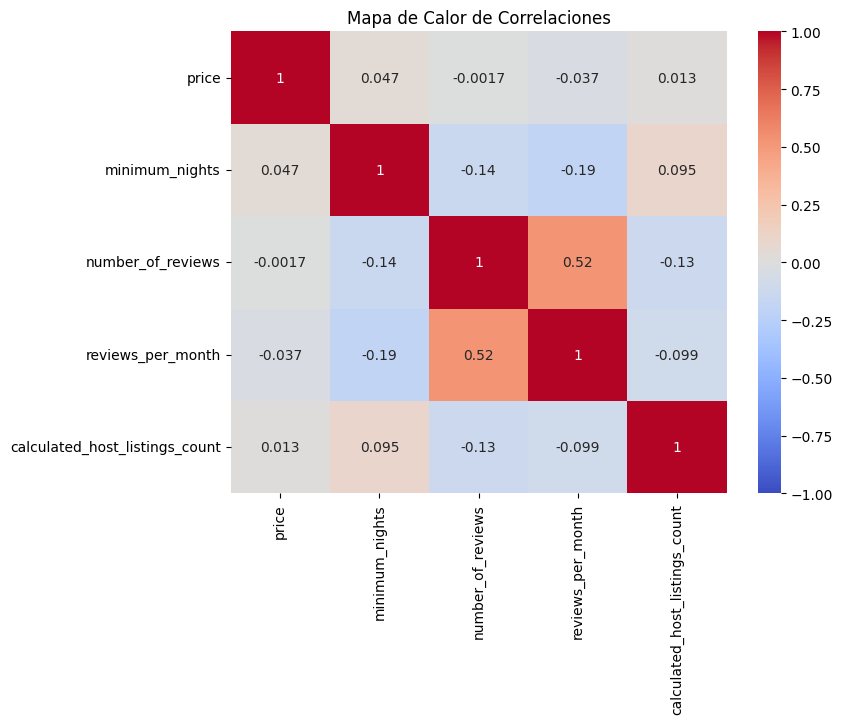

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogramas de distribución
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribución de Precios')

plt.subplot(1, 3, 2)
sns.histplot(df['minimum_nights'], kde=True, bins=50)
plt.title('Distribución de Noches Mínimas')

plt.subplot(1, 3, 3)
sns.histplot(df['number_of_reviews'], kde=True, bins=50)
plt.title('Distribución de Número de Reseñas')

plt.tight_layout()
plt.show()

# 2. Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['price'])
plt.title('Boxplot de Precios')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot de Noches Mínimas')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['number_of_reviews'])
plt.title('Boxplot de Número de Reseñas')

plt.tight_layout()
plt.show()

# 3. Mapa de calor para correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


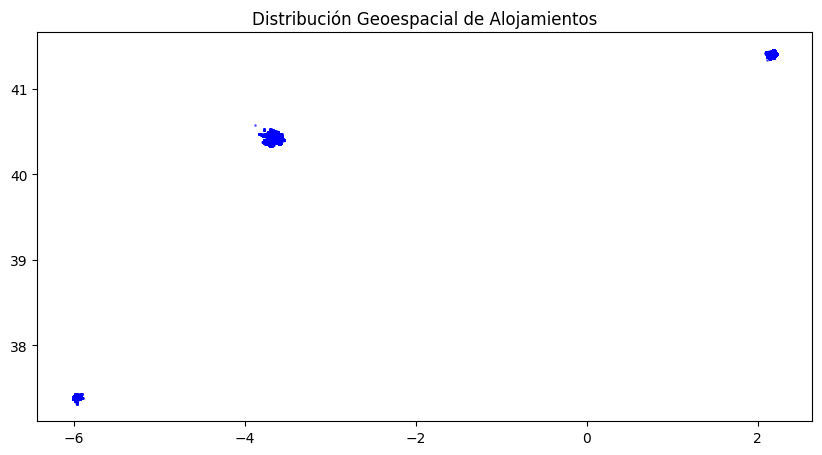

In [11]:
import geopandas as gpd
from shapely.geometry import Point

# Crear un DataFrame geoespacial
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Graficar
gdf.plot(figsize=(10, 10), markersize=1, color='blue', alpha=0.5)
plt.title('Distribución Geoespacial de Alojamientos')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos
df = pd.read_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv', low_memory=False)  # Asegúrate de poner la ruta correcta

# Mostrar las primeras filas del dataframe
print(df.head())

# Verificar los valores nulos y tipos de datos
print(df.info())

# Si hay columnas no numéricas, las convertimos en categóricas
categorical_columns = ['city', 'room_type']  # Ejemplo de columnas categóricas
numerical_columns = ['price', 'availability', 'reviews', 'latitude', 'longitude']  # Ejemplo de columnas numéricas

# Preprocesamiento de las columnas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputar valores nulos con la mediana
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

# Preprocesamiento de las columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputar valores nulos con 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación OneHot
])

# Unir todo en un preprocesador de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('price', axis=1)  # Variable independiente
y = df['price']  # Variable dependiente (precios)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



      id   host_id neighbourhood_group                       neighbourhood  \
0  18674   71615.0            Eixample                  la Sagrada Família   
1  23197   90417.0          Sant Martí               el Besòs i el Maresme   
2  32711  135703.0              Gràcia  el Camp d'en Grassot i Gràcia Nova   
3  34241   73163.0        Ciutat Vella                      el Barri Gòtic   
4  34981   73163.0        Ciutat Vella                      el Barri Gòtic   

    latitude  longitude        room_type  price  minimum_nights  \
0  41.405560    2.17262  Entire home/apt  194.0             1.0   
1  41.412432    2.21975  Entire home/apt  304.0             3.0   
2  41.405660    2.17015  Entire home/apt  211.0             1.0   
3  41.380620    2.17517  Entire home/apt  300.0             5.0   
4  41.379780    2.17623  Entire home/apt  314.0             5.0   

   number_of_reviews last_review  reviews_per_month  \
0               42.0  2024-06-03               0.31   
1               79

In [13]:
X_train

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,month,state
134593,562081533819317485,391810099.0,Salamanca,Goya,40.422140,-3.678410,Entire home/apt,1.0,5.0,2022-04-16,0.24,89.0,0.0,0.0,48/284731.9/21,December,Madrid
197130,770479807076257638,101553096.0,Chamberí,Trafalgar,40.433290,-3.698180,Entire home/apt,3.0,115.0,2025-02-09,4.20,1.0,8.0,58.0,NaN,March,Madrid
54595,604936350988798002,158023606.0,Ciutat Vella,el Barri Gòtic,41.386480,2.174600,Entire home/apt,1.0,1.0,2023-01-06,0.09,131.0,44.0,1.0,Exempt,December,Barcelona
71704,8424880,547389.0,Chamberí,Rios Rosas,40.438960,-3.703180,Private room,7.0,0.0,NaN,NaN,4.0,363.0,0.0,NaN,September,Madrid
172941,816522533248968586,128516725.0,Horta-Guinardó,el Baix Guinardó,41.411487,2.172716,Private room,32.0,1.0,2023-05-17,0.14,2.0,90.0,1.0,NaN,December,Sevilla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1055186192945536047,91733638.0,Ciudad Lineal,San Pascual,40.439044,-3.653964,Private room,1.0,21.0,2024-06-07,4.12,1.0,80.0,21.0,NaN,June,Madrid
103694,5439451,27573645.0,Moncloa - Aravaca,Ciudad Universitaria,40.466240,-3.761530,Entire home/apt,7.0,0.0,NaN,NaN,1.0,358.0,0.0,NaN,June,Madrid
131932,45086755,283039038.0,Moncloa - Aravaca,Argüelles,40.432130,-3.719040,Entire home/apt,2.0,84.0,2023-12-03,2.12,2.0,80.0,45.0,NaN,December,Madrid
146867,5636225,4067193.0,Casco Antiguo,Feria,37.396770,-5.994220,Entire home/apt,3.0,266.0,2024-03-21,2.42,1.0,246.0,50.0,VFT/SE/01119,March,Sevilla


In [14]:
X_test

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,month,state
136569,683670106611395708,471977881.0,Centro,Embajadores,40.413130,-3.706240,Private room,30.0,0.0,NaN,NaN,148.0,258.0,0.0,NaN,December,Madrid
73223,49127744,143484776.0,Centro,Palacio,40.419650,-3.708110,Entire home/apt,4.0,4.0,2023-12-25,0.11,3.0,184.0,1.0,NaN,September,Madrid
67767,18102248,124674295.0,Centro,Justicia,40.427300,-3.701060,Entire home/apt,3.0,4.0,2019-11-05,0.04,1.0,173.0,0.0,NaN,September,Madrid
30430,939692,1298586.0,Sant Martí,el Poblenou,41.399450,2.199960,Entire home/apt,2.0,116.0,2024-05-12,0.86,7.0,151.0,19.0,HUTB-009229,June,Barcelona
173516,852368866008082115,504452584.0,Ciutat Vella,el Barri Gòtic,41.382972,2.178141,Private room,1.0,38.0,2023-11-16,4.30,5.0,21.0,38.0,Exempt,December,Sevilla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,38148875,30453303.0,Gràcia,Vallcarca i els Penitents,41.412310,2.148980,Private room,31.0,8.0,2023-06-11,0.14,2.0,121.0,0.0,Exempt,September,Barcelona
43279,1092035868617860266,562198039.0,Sants-Montjuïc,Sants,41.375126,2.138096,Private room,5.0,3.0,2024-06-03,0.96,5.0,96.0,3.0,Exempt,June,Barcelona
106658,29938173,8759456.0,Fuencarral - El Pardo,Valverde,40.503410,-3.689380,Entire home/apt,4.0,63.0,2024-05-15,0.94,1.0,228.0,17.0,NaN,June,Madrid
201004,1074554633797211328,444912851.0,Chamartín,Prosperidad,40.444926,-3.669670,Entire home/apt,1.0,21.0,2025-02-21,1.56,150.0,294.0,16.0,NaN,March,Madrid


In [15]:
df['price'] = df['price'].fillna(df['price'].median())


In [16]:
print(df.columns)


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'month', 'state'],
      dtype='object')


In [17]:
print(df['price'].dtype)


float64


In [18]:
print(df['price'].isnull().sum())


0


In [19]:
print(df.columns)  # Verifica que 'price' sigue presente antes de dividir X e y


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'month', 'state'],
      dtype='object')


In [20]:
X = df.drop(columns=['price'])  # Variables independientes
y = df['price']  # Variable dependiente (precio)



In [21]:
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 
                     'number_of_reviews', 'reviews_per_month', 
                     'availability_365', 'number_of_reviews_ltm']
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'state']


In [22]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])


In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar datos
df = pd.read_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv', low_memory=False) 

# Verificar columnas antes de separar X e y
print("Columnas del DataFrame:", df.columns)

# Asegurar que 'price' es numérico y sin nulos
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(df['price'].fillna(0))

# Definir variables numéricas y categóricas
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 
                     'number_of_reviews', 'reviews_per_month', 
                     'availability_365', 'number_of_reviews_ltm']
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'state']

# Separar X (features) e y (target)
X = df.drop(columns=['price'])
y = df['price']

# Verificar si 'price' sigue existiendo en X (no debería estar)
print("¿'price' en X?", 'price' in X.columns)

Columnas del DataFrame: Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'month', 'state'],
      dtype='object')
¿'price' en X? False


In [24]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Preprocesamiento
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

In [26]:
# Modelo de regresión
regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])

In [27]:
# Tomar una muestra de 10% del conjunto de entrenamiento
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]  # Asegurarse de que las muestras de X y y coincidan

# Entrenar el modelo con la muestra
regressor.fit(X_train_sample, y_train_sample)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'availability_365',
                                                   'number_of_reviews_ltm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood', 'room_type',
                                                   'state'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [28]:

# Predicciones
y_pred = regressor.predict(X_test)


In [29]:
# Evaluar modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [30]:
# Resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 84.44175771755198
MSE: 140460.19507419522
RMSE: 374.7801956803417
R2: -0.2021390343229803


<Axes: ylabel='price'>

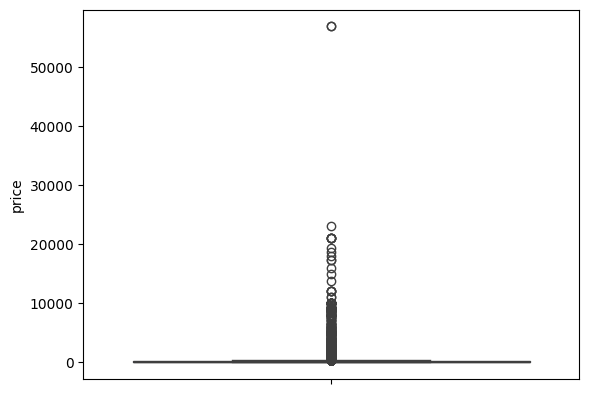

In [31]:
import seaborn as sns  
sns.boxplot(y=df['price'])


In [32]:
df['price'] = np.log1p(df['price'])  


In [33]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Columnas categóricas en X_train:", categorical_cols)


Columnas categóricas en X_train: Index(['id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'last_review', 'license', 'month', 'state'],
      dtype='object')


In [34]:
print(X_train.columns)


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'month',
       'state'],
      dtype='object')


In [35]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Verificar qué columnas están realmente en X_train antes de eliminarlas
cols_to_drop = [col for col in ['id', 'license'] if col in X_train.columns]
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')

# Convertir fechas solo si la columna existe
if "last_review" in X_train.columns:
    X_train["last_review"] = pd.to_datetime(X_train["last_review"], errors='coerce')
    X_train["days_since_last_review"] = (pd.to_datetime("today") - X_train["last_review"]).dt.days
    X_train = X_train.drop(columns=["last_review"])

# Verificar qué columnas categóricas existen antes de hacer One-Hot Encoding
categorical_cols = [col for col in ['neighbourhood_group', 'neighbourhood', 'room_type', 'state'] if col in X_train.columns]

if categorical_cols:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    X_encoded = encoder.fit_transform(X_train[categorical_cols])

    # Convertir a DataFrame
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)

    # Eliminar las originales y reemplazarlas por las codificadas
    X_train = X_train.drop(columns=categorical_cols)
    X_train = pd.concat([X_train, X_encoded_df], axis=1)

# Confirmar que ya no hay texto
print(X_train.dtypes)


host_id                  float64
latitude                 float64
longitude                float64
minimum_nights           float64
number_of_reviews        float64
                          ...   
room_type_Shared room    float64
state_Barcelona          float64
state_Desconocido        float64
state_Madrid             float64
state_Sevilla            float64
Length: 362, dtype: object


In [36]:
# Aplicar las mismas transformaciones a X_test
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')

if "last_review" in X_test.columns:
    X_test["last_review"] = pd.to_datetime(X_test["last_review"], errors='coerce')
    X_test["days_since_last_review"] = (pd.to_datetime("today") - X_test["last_review"]).dt.days
    X_test = X_test.drop(columns=["last_review"])

# Aplicar One-Hot Encoding con el mismo encoder
if categorical_cols:
    X_encoded_test = encoder.transform(X_test[categorical_cols])
    X_encoded_test_df = pd.DataFrame(X_encoded_test, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

    X_test = X_test.drop(columns=categorical_cols)
    X_test = pd.concat([X_test, X_encoded_test_df], axis=1)


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Asegurar que la columna 'month' esté en formato numérico (One-Hot Encoding)
if 'month' in X_train.columns and X_train['month'].dtype == 'object':
    print("Corrigiendo la columna 'month'...")
    X_train = pd.get_dummies(X_train, columns=['month'])
    X_test = pd.get_dummies(X_test, columns=['month'])

# Asegurar que ambas matrices tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Verificar que todo sea numérico antes de entrenar
print("Tipos de datos en X_train:")
print(X_train.dtypes.value_counts())  # Ver cuántas columnas son float/int


Corrigiendo la columna 'month'...
Tipos de datos en X_train:
float64    361
bool         4
Name: count, dtype: int64


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Tomar una muestra de 10% del conjunto de entrenamiento
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Crear el modelo RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Entrenar el modelo con la muestra
rf_model.fit(X_train_sample, y_train_sample)

# Realizar predicciones con el conjunto de test completo
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir resultados de la evaluación
print(f"MAE (Random Forest): {mae_rf}")
print(f"R2 (Random Forest): {r2_rf}")


MAE (Random Forest): 78.86844611963424
R2 (Random Forest): -0.04771673286401401


In [39]:
import numpy as np

# Eliminar precios que estén en el percentil 99% (extremadamente altos)
upper_limit = np.percentile(y_train, 95)
X_train = X_train[y_train < upper_limit]
y_train = y_train[y_train < upper_limit]


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Tomar una muestra del 10% del conjunto de entrenamiento
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]  # Asegurarse de que las muestras de X y y coincidan

# Crear el modelo RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo con la muestra
rf_model.fit(X_train_sample, y_train_sample)

# Realizar predicciones con el conjunto de test completo
y_pred_rf = rf_model.predict(X_test)



In [41]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Tomar una muestra del 10% del conjunto de entrenamiento
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]  # Asegurarse de que las muestras de X y y coincidan

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2', n_jobs=-1)

# Ejecutar GridSearchCV sobre la muestra de datos
grid_search.fit(X_train_sample, y_train_sample)

# Imprimir los mejores parámetros encontrados
print(grid_search.best_params_)


{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [43]:
X_train["long_stay"] = (X_train["minimum_nights"] > 30).astype(int)
X_test["long_stay"] = (X_test["minimum_nights"] > 30).astype(int)


In [44]:
import numpy as np

# Coordenadas del centro de cada ciudad
coordinates = {
    'Madrid': (40.4168, -3.7038),
    'Barcelona': (41.3784, 2.1922),
    'Sevilla': (37.3886, -5.9823)
}

def distance_to_city_center(lat, lon, city):
    city_lat, city_lon = coordinates[city]
    return np.sqrt((lat - city_lat) ** 2 + (lon - city_lon) ** 2)

# Supongamos que tienes X_train y X_test con las columnas 'latitude', 'longitude'
X_train["distance_center"] = X_train.apply(lambda row: distance_to_city_center(row["latitude"], row["longitude"], "Madrid"), axis=1)
X_test["distance_center"] = X_test.apply(lambda row: distance_to_city_center(row["latitude"], row["longitude"], "Madrid"), axis=1)


In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # También puedes probar "median" o "most_frequent"
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [46]:
print("Shape de X_train:", X_train.shape)  # Debería ser algo como (n_samples, n_features)


Shape de X_train: (157557, 367)


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


MAE: 84.44175771755198
MSE: 140460.19507419522
RMSE: 374.7801956803417
R2: -0.2021390343229803


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Tomar una muestra del 10% del conjunto de entrenamiento
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]  # Asegurarse de que las muestras de X y y coincidan

# Definir el modelo RandomForest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Parámetros reducidos para una búsqueda más rápida
param_dist = {
    'n_estimators': [50, 100],  # Reducimos opciones
    'max_depth': [10, 20],  # Reducimos opciones
    'min_samples_split': [2, 5],  # Reducimos opciones
    'min_samples_leaf': [1, 2],  # Reducimos opciones
}

# Inicializar RandomizedSearchCV (prueba 10 combinaciones aleatorias)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Probar 10 combinaciones en lugar de todas
    cv=3,  # Reducimos la validación cruzada a 3 folds
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar el modelo con la muestra de los datos de entrenamiento
random_search.fit(X_train_sample, y_train_sample)

# Ver los mejores parámetros
print(f"Best parameters: {random_search.best_params_}")

# Predecir y evaluar el modelo optimizado con el conjunto de test completo
y_pred = random_search.best_estimator_.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")


AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [62]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Preprocesamiento: Normalización para regresión lineal, reducción de outliers
scaler = Pipeline([
    ("quantile", QuantileTransformer(output_distribution="normal")),
    ("standard", StandardScaler())
])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Lineal Mejorado
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

print("\n🔷 Regresión Lineal Mejorada")
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear):.4f}")
print(f"R²: {r2_score(y_test, y_pred_linear):.4f}")

# Hiperparámetros para XGBoost
xgb_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 10],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}

# Búsqueda de hiperparámetros con RandomizedSearchCV
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, cv=3, n_jobs=-1, verbose=1)
xgb_search.fit(X_train_scaled, y_train)

# Mejor modelo de XGBoost
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("\n🔷 XGBoost Mejorado")
print(f"Mejores parámetros: {xgb_search.best_params_}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")
print(f"R²: {r2_score(y_test, y_pred_xgb):.4f}")



🔷 Regresión Lineal Mejorada
MAE: 72.7408
R²: 0.0213
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\alber\anaconda3\envs\Mapache\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



🔷 XGBoost Mejorado
Mejores parámetros: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
MAE: 64.9178
R²: 0.0362


In [63]:
# Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
print("Regresión Lineal")
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear)}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")

# Modelo XGBoost
xgboost_model = XGBRegressor(n_estimators=200, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
print("XGBoost")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R²: {r2_score(y_test, y_pred_xgb)}")


Regresión Lineal
MAE: 73.2545972737454
R²: 0.017632309340775976
XGBoost
MAE: 60.72309744546225
R²: 0.04496314152529368


In [52]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definir el modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Crear una nueva variable objetivo: "alta demanda" vs "baja demanda"
# Para este ejemplo, vamos a clasificar los precios más altos como "alta demanda" (por ejemplo, arriba del 75% percentil)
threshold = y_train.quantile(0.75)
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Entrenar el modelo de clasificación
rf_classifier.fit(X_train, y_train_class)

# Predecir y evaluar el modelo de clasificación
y_pred_class = rf_classifier.predict(X_test)
print("Clasificación de Demanda (Alta/Baja)")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print(classification_report(y_test_class, y_pred_class))


Clasificación de Demanda (Alta/Baja)
Accuracy: 0.8516895065147757
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     29755
           1       0.84      0.59      0.69     11766

    accuracy                           0.85     41521
   macro avg       0.85      0.77      0.80     41521
weighted avg       0.85      0.85      0.84     41521



In [56]:
kmeans.fit(X_train[:, [4, 5, 7]])  # Suponiendo que price, latitude y longitude están en las primeras tres columnas


KMeans(n_clusters=5, random_state=42)

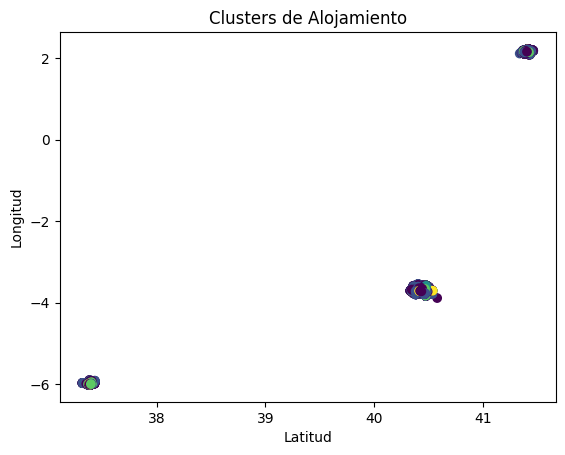

In [54]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Definir el número de clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Asegúrate de que 'X_train' contiene las columnas en el orden correcto: price, latitude, longitude.
# Si el índice de las columnas es diferente, ajusta estos índices
# Aquí asumimos que 'price', 'latitude' y 'longitude' son las primeras tres columnas de X_train
X_train_subset = X_train[:, [4, 5, 7]]  # Selecciona las primeras tres columnas (ajusta los índices si es necesario)

# Ajustar el modelo de clustering
kmeans.fit(X_train_subset)

# Predecir los clusters
clusters = kmeans.predict(X_train_subset)

# Convertir X_train a un DataFrame para añadir la columna de clusters
X_train_df = pd.DataFrame(X_train)

# Añadir la columna de clusters al DataFrame
X_train_df['cluster'] = clusters

# Visualizar los clusters (por ejemplo, con precio y ubicación)
plt.scatter(X_train_df[1], X_train_df[2], c=X_train_df['cluster'], cmap='viridis')  # Asegúrate de que las columnas 1 y 2 corresponden a 'latitude' y 'longitude'
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Clusters de Alojamiento')
plt.show()


In [59]:
print(X_train_df.head())


             0          1         2     3      4         5      6      7  \
0  391810099.0  40.422140 -3.678410   1.0    5.0  0.240000   89.0    0.0   
1  101553096.0  40.433290 -3.698180   3.0  115.0  4.200000    1.0    8.0   
2  158023606.0  41.386480  2.174600   1.0    1.0  0.090000  131.0   44.0   
3     547389.0  40.438960 -3.703180   7.0    0.0  1.881251    4.0  363.0   
4  128516725.0  41.411487  2.172716  32.0    1.0  0.140000    2.0   90.0   

      8            9  ...  358  359  360  361  362  363  364  365       366  \
0   0.0  1083.000000  ...  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.025945   
1  58.0    53.000000  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.017421   
2   1.0   818.000000  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  5.957841   
3   0.0   428.880357  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.022169   
4   1.0   687.000000  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  5.960104   

   cluster  
0        0  
1        4  
2        0  
3        1  
4  

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asegurarse de que 'X_train' tiene la forma correcta
X_train_df = pd.DataFrame(X_train[:, [0, 1]], columns=['reviews_per_month'])

# Limpiar los valores de 'month' para asegurarnos de que estén en un formato adecuado
# Supongamos que 'month' contiene números entre 1 y 12, representando los meses del año.

# Primero, convertimos los valores a enteros y manejamos posibles valores no válidos
X_train_df['month'] = X_train_df['month'].apply(lambda x: int(str(x)[:2]) if len(str(x)) > 1 else int(x))

# Validamos que 'month' esté en el rango de 1 a 12
X_train_df = X_train_df[X_train_df['month'].between(1, 3, inclusive='both')]

# Asignamos un año fijo (por ejemplo, 2021) y construimos la fecha
X_train_df['date'] = pd.to_datetime(X_train_df['month'].astype(str) + '-01-2021', format='%m-%d-%Y')

# Establecer el índice como la columna 'date'
X_train_df.set_index('date', inplace=True)

# Ahora puedes usar la columna 'reviews_per_month' como tu serie temporal
time_series = X_train_df['reviews_per_month']

# Visualizar la serie temporal
time_series.plot()
plt.title('Número de Reseñas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Reseñas')
plt.show()

# Ajustar el modelo ARIMA (verifica que el modelo esté bien ajustado)
model = ARIMA(time_series, order=(5, 1, 0))  # Cambia los parámetros si es necesario
model_fit = model.fit()

# Realizar predicciones (por ejemplo, para los próximos 6 meses)
forecast = model_fit.forecast(steps=6)

# Imprimir las predicciones
print("Predicciones para los próximos 6 meses:", forecast)


ValueError: Shape of passed values is (157557, 2), indices imply (157557, 1)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Escalar las características (esto es importante para las redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la Red Neuronal Artificial (ANN)
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada
model.add(Dropout(0.3))  # Dropout para evitar sobreajuste
model.add(Dense(64, activation='relu'))  # Capa oculta
model.add(Dropout(0.3))  # Dropout adicional
model.add(Dense(1))  # Capa de salida (único valor de predicción, el precio)

# Compilar el modelo con optimizador Adam y agregar R² como métrica
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Configurar el callback de EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, 
          validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Hacer predicciones
y_pred_dl = model.predict(X_test_scaled)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_dl)
r2 = r2_score(y_test, y_pred_dl)

print(f"MAE (Deep Learning): {mae}")
print(f"R² (Deep Learning): {r2}")


c:\Users\alber\anaconda3\envs\Mapache\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4605.0142 - mae: 48.5406 - val_loss: 2771.3423 - val_mae: 37.8039
Epoch 2/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3056.0552 - mae: 39.9358 - val_loss: 2701.7471 - val_mae: 37.3596
Epoch 3/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3000.5181 - mae: 39.3246 - val_loss: 2725.0823 - val_mae: 36.6843
Epoch 4/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3001.6716 - mae: 39.2835 - val_loss: 2757.6765 - val_mae: 36.7629
Epoch 5/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2924.8015 - mae: 38.6271 - val_loss: 2724.9902 - val_mae: 37.2279
Epoch 6/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2888.9246 - mae: 38.4805 - val_loss: 2769.9504 - val_mae: 36.0118
Epoch 7/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2901.7437 - mae: 38.4450 - val_loss: 2696.5205 - val_mae: 36.5285
Epoch 8/200
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2875.3733 - mae: 38.3556 - val_los

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Red Neuronal para clasificación
model_class = Sequential()
model_class.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada
model_class.add(Dropout(0.3))  # Dropout para evitar sobreajuste
model_class.add(Dense(64, activation='relu'))  # Capa oculta
model_class.add(Dropout(0.3))  # Dropout adicional
model_class.add(Dense(1, activation='sigmoid'))  # Capa de salida (sigmoide para clasificación binaria)

# Compilar el modelo
model_class.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy', 'AUC'])

# Configurar el callback de EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
model_class.fit(X_train_scaled, y_train_class, epochs=100, 
                batch_size=32, validation_split=0.2, 
                verbose=1, callbacks=[early_stopping])

# Hacer predicciones
y_pred_class_dl = model_class.predict(X_test_scaled)

# Convertir las predicciones a 0 o 1
y_pred_class_dl = (y_pred_class_dl > 0.5).astype(int)

# Evaluar el modelo
accuracy = accuracy_score(y_test_class, y_pred_class_dl)
print(f"Accuracy (Deep Learning Classification): {accuracy}")
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class_dl))


c:\Users\alber\anaconda3\envs\Mapache\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.7677 - accuracy: 0.7815 - loss: 0.4792 - val_AUC: 0.8300 - val_accuracy: 0.8080 - val_loss: 0.4149
Epoch 2/100
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.8224 - accuracy: 0.8070 - loss: 0.4213 - val_AUC: 0.8382 - val_accuracy: 0.8129 - val_loss: 0.4064
Epoch 3/100
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.8311 - accuracy: 0.8091 - loss: 0.4148 - val_AUC: 0.8450 - val_accuracy: 0.8158 - val_loss: 0.4002
Epoch 4/100
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.8377 - accuracy: 0.8105 - loss: 0.4072 - val_AUC: 0.8470 - val_accuracy: 0.8151 - val_loss: 0.4008
Epoch 5/100
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.8415 - accuracy: 0.8141 - loss: 0.4039 - val_AUC: 0.8503 - val_accuracy: 0.8170 - val_loss: 0.3948
Epoch 6/100
3939/3939 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.8434 - accuracy: 0.8153 - loss: 0.4017 - val_AUC: 0.8511 - val_accuracy: 0.8171 - val_loss: 0.3942
Epoch 7/100
3939/393

In [66]:
import pandas as pd

# Cargar sin especificar la fecha para inspeccionar las columnas
df = pd.read_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv')

# Mostrar los primeros registros y nombres de columnas
print(df.head())
print(df.columns)


      id   host_id neighbourhood_group                       neighbourhood  \
0  18674   71615.0            Eixample                  la Sagrada Família   
1  23197   90417.0          Sant Martí               el Besòs i el Maresme   
2  32711  135703.0              Gràcia  el Camp d'en Grassot i Gràcia Nova   
3  34241   73163.0        Ciutat Vella                      el Barri Gòtic   
4  34981   73163.0        Ciutat Vella                      el Barri Gòtic   

    latitude  longitude        room_type  price  minimum_nights  \
0  41.405560    2.17262  Entire home/apt  194.0             1.0   
1  41.412432    2.21975  Entire home/apt  304.0             3.0   
2  41.405660    2.17015  Entire home/apt  211.0             1.0   
3  41.380620    2.17517  Entire home/apt  300.0             5.0   
4  41.379780    2.17623  Entire home/apt  314.0             5.0   

   number_of_reviews last_review  reviews_per_month  \
0               42.0  2024-06-03               0.31   
1               79

C:\Users\alber\AppData\Local\Temp\ipykernel_12012\4036929149.py:4: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv')


In [67]:
df = pd.read_csv(
    r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv',
    parse_dates=["last_review"],  # Cambia "fecha" por "last_review"
    index_col="last_review",  
    dtype={"id": str, "license": str},  # Forzar que sean strings
    low_memory=False  # Para evitar el warning
)


In [68]:
import pandas as pd
import numpy as np

# Cargar el DataFrame asegurando que 'last_review' es interpretado como fecha
df = pd.read_csv(
    r'C:\Users\alber\OneDrive\Escritorio\Data\DataSetLimpio.csv',
    parse_dates=["last_review"],  # Cambié 'fecha' por 'last_review'
    index_col="last_review",  # Usar 'last_review' como índice si es relevante
    dtype={"id": str, "license": str},  # Evitar warnings forzando tipos
    low_memory=False  # Prevenir advertencias de uso de memoria
)

# Verifica las primeras filas y el índice
print(df.head())
print(f"Tipo de índice: {type(df.index)}")

# Verificar si 'reviews_per_month' existe
if "reviews_per_month" in df.columns:
    time_series = df["reviews_per_month"].dropna()  # Eliminar valores NaN
else:
    raise ValueError("La columna 'reviews_per_month' no se encuentra en el DataFrame.")

# Convertir a un array numpy con reshape
reviews_per_month = time_series.values.reshape(-1, 1)

# Parámetro de ventana temporal
time_step = 12

# Mostrar información útil
print(f"Tamaño de la serie temporal: {reviews_per_month.shape}")


                id   host_id neighbourhood_group  \
last_review                                        
2024-06-03   18674   71615.0            Eixample   
2024-06-24   23197   90417.0          Sant Martí   
2024-09-05   32711  135703.0              Gràcia   
2024-08-20   34241   73163.0        Ciutat Vella   
2024-09-02   34981   73163.0        Ciutat Vella   

                                  neighbourhood   latitude  longitude  \
last_review                                                             
2024-06-03                   la Sagrada Família  41.405560    2.17262   
2024-06-24                el Besòs i el Maresme  41.412432    2.21975   
2024-09-05   el Camp d'en Grassot i Gràcia Nova  41.405660    2.17015   
2024-08-20                       el Barri Gòtic  41.380620    2.17517   
2024-09-02                       el Barri Gòtic  41.379780    2.17623   

                   room_type  price  minimum_nights  number_of_reviews  \
last_review                                      

In [ ]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Preparar los datos para LSTM (requiere formato [muestras, timesteps, características])
# Vamos a suponer que tenemos una serie temporal de 'reviews_per_month'
# Primero, necesitamos organizar los datos en ventanas de tiempo (timesteps)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Transformar los datos en una serie temporal
reviews_per_month = time_series.values.reshape(-1, 1)

# Crear los datos para entrenamiento con una ventana temporal de 12 meses
time_step = 12
X, y = create_dataset(reviews_per_month, time_step)

# Redimensionar para LSTM [muestras, timesteps, características]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Crear el modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model_lstm.add(Dense(1))  # Capa de salida

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Configurar el callback de EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
model_lstm.fit(X, y, epochs=200, batch_size=32)

# Predecir la demanda futura (por ejemplo, para los siguientes 12 meses)
future_predictions = model_lstm.predict(X[-12:])  # Predecir los próximos 12 valores

# Visualizar la predicción
plt.plot(range(len(time_series)), time_series.values, label='Histórico')
plt.plot(range(len(time_series), len(time_series) + 12), future_predictions, label='Predicción Futura', color='red')
plt.title('Predicción de Demanda Futura con LSTM')
plt.xlabel('Mes')
plt.ylabel('Número de Reseñas por Mes')
plt.legend()
plt.show()


Epoch 1/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 3.9520
Epoch 2/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 3.8697
Epoch 3/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 3.8029
Epoch 4/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 3.7693
Epoch 5/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 3.8570
Epoch 6/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 4.0144
Epoch 7/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 3.7453
Epoch 8/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 3.7362
Epoch 9/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 3.8339
Epoch 10/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 3.7741
Epoch 11/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 3.7706
Epoch 12/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 4.0718
Epoch 13/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 3.7202
Epoch 14/200
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 4.0092
E